In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]].values

In [47]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=8, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=6, max_iter=300).fit(x)
y_clustering=clustering.labels_
y_clustering

array([10,  7,  9,  7, 10,  7,  9, 20,  9,  7,  9, 20,  9,  7,  9,  7, 10,
       32, 10, 20, 10,  7, 19, 12, 18, 16, 10, 32, 10, 16, 19, 12, 19, 24,
       18, 16, 18, 12, 15, 12, 15, 24, 15, 32, 15, 32,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  1,
        1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  8,  0,  3,  8,  5,  8,  3,  4,  5,  4,  5,  8,  5,  4,  3,
        4,  5,  4,  5,  4,  3,  8,  3,  4,  3,  8,  5,  6,  3,  6,  3,  6,
        5,  6,  3,  4,  5,  4,  5,  8,  3,  4,  3, 17, 14, 17, 11, 17, 14,
        6, 14,  6, 11,  6, 11,  6, 14, 13, 11, 23, 11, 13, 11, 23, 31, 13,
       22, 13, 11, 13, 22, 30, 29, 28, 21, 27, 21, 26, 25], dtype=int64)

In [48]:
supervised=pd.DataFrame(dataset)
supervised['cluster_group']=y_clustering
supervised


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,10
1,2,Male,21,15,81,7
2,3,Female,20,16,6,9
3,4,Female,23,16,77,7
4,5,Female,31,17,40,10
...,...,...,...,...,...,...
195,196,Female,35,120,79,21
196,197,Female,45,126,28,27
197,198,Male,32,126,74,21
198,199,Male,32,137,18,26


In [49]:
supervised.to_csv('cluster.csv',index=False)
centroids=clustering.cluster_centers_
centroids

array([[ 60.46666667,  45.6       ],
       [ 53.78571429,  50.96428571],
       [ 45.68421053,  50.78947368],
       [ 75.90909091,  90.36363636],
       [ 75.1       ,   6.6       ],
       [ 74.2       ,  74.4       ],
       [ 82.        ,  16.44444444],
       [ 19.5       ,  76.        ],
       [ 73.14285714,  35.57142857],
       [ 19.57142857,   8.85714286],
       [ 21.33333333,  35.        ],
       [ 92.6       ,  88.4       ],
       [ 30.        ,  73.4       ],
       [101.25      ,  19.75      ],
       [ 86.75      ,  70.5       ],
       [ 38.25      ,  31.25      ],
       [ 30.75      ,  85.5       ],
       [ 86.        ,  24.33333333],
       [ 31.66666667,  15.        ],
       [ 29.33333333,   4.33333333],
       [ 20.        ,  97.        ],
       [123.        ,  76.5       ],
       [102.        ,  68.5       ],
       [ 98.        ,  35.5       ],
       [ 35.5       ,  92.        ],
       [137.        ,  83.        ],
       [137.        ,  18.        ],
 

C:\Anaconda3\envs\dineshML\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


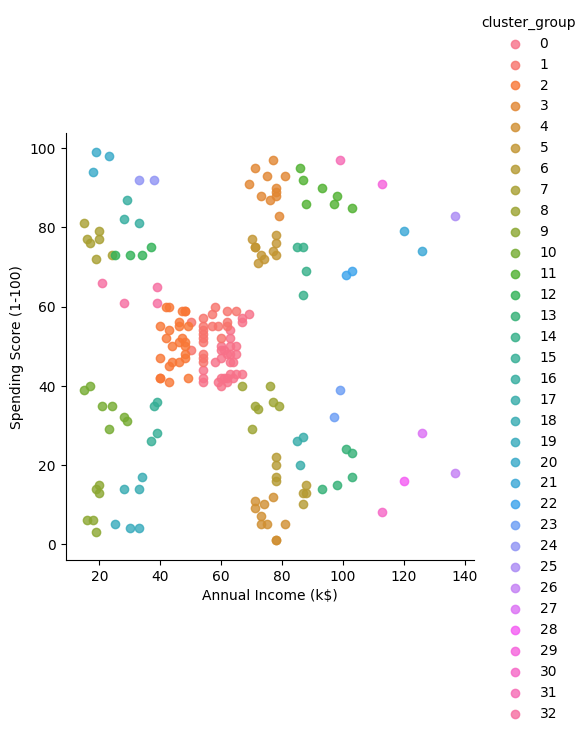

In [50]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)

In [51]:
y_pred=clustering.predict(x)

In [52]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(x,y_pred)

In [53]:
silhouette_avg

0.371826427911085

In [54]:
import pickle
filename="finalized_model_Meanshift.sav"

In [55]:
pickle.dump(clustering,open(filename,'wb'))

In [56]:
loaded_model=pickle.load(open("finalized_model_Meanshift.sav",'rb'))
result=loaded_model.predict([[120,79]])

In [22]:
result

array([42], dtype=int64)